# 为什么使用测试数据集

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
x = np.random.uniform(-3, 3, 121)
x.sort()
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x - 2 + np.random.normal(0, 1, x.shape[0])

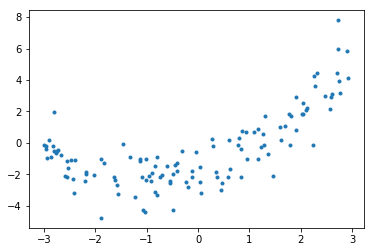

In [7]:
plt.scatter(x, y, marker=".")
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [10]:
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [11]:
reg100 = PolynomialRegression(100)
reg100.fit(X, y)
reg100.score(X, y)

0.8702085655190317

In [12]:
from sklearn.metrics import mean_squared_error

y100_predict = reg100.predict(X)
mean_squared_error(y, y100_predict)

0.68965193602203356

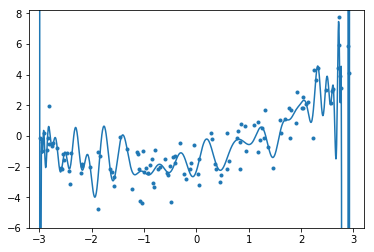

In [14]:
cx = np.linspace(-3, 3, 961)
cy = reg100.predict(cx.reshape(-1, 1))

plt.scatter(x, y, marker=".")
plt.plot(cx, cy)
plt.axis([-3.2, 3.2, -6, 8.2])
plt.show()

#### train test split的意义

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [17]:
reg100 = PolynomialRegression(100)
reg100.fit(X_train, y_train)
reg100.score(X_test, y_test)

-2269136935226.4653

In [19]:
y100_predict = reg100.predict(X_test)
mean_squared_error(y_test, y100_predict)

10837799948861.918